In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import astropy
from astropy.io import fits
from astropy import cosmology
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=75. * u.km / u.s / u.Mpc, Om0=0.31)
c = 299792.458
from scipy.stats import norm

In [2]:
sdss_desi_pv = pd.read_csv('coma_sdss_desi.csv')

In [3]:
sdss_desi_pv

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid_1,id,healpix_1,survey_x,program_x,targetid.1,...,s_2,es_2,Sn_2,logdist_2,logdist_err_2,logdist_alpha_2,logdist_corr_2,logdist_corr_err,logdist_corr_alpha,Separation
0,39628422523128777,203,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,...,2.41535,0.00538,1.00000,-0.001810,0.096055,-0.397190,0.038192,0.092604,-0.463153,0.028332
1,39628443939243735,11,193.999798,28.186935,39628443939243735,1267,10400,sv1,bright,39628443939243735,...,2.23734,0.00928,0.08869,-0.135559,0.098714,-0.531329,-0.052132,0.095131,-0.508935,0.074184
2,39628438604091708,1276,194.124215,27.939990,39628438604091708,3319,10400,sv3,bright,39628438604091708,...,2.32626,0.00590,0.44381,-0.170886,0.098173,-0.549678,-0.149937,0.095102,-0.496969,0.048567
3,39628443956022818,137,195.217035,28.366121,39628443956022818,3176,10379,sv3,bright,39628443956022818,...,2.26612,0.00724,1.00000,0.108142,0.095568,-0.252520,0.138067,0.084805,-0.227269,0.070434
4,39628427900225097,311,194.142478,27.538965,39628427900225097,3319,10400,sv3,bright,39628427900225097,...,2.25150,0.00630,0.38747,-0.070067,0.096707,-0.470989,-0.026037,0.093434,-0.496379,0.131515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,39628443951827123,3012,194.834222,28.197912,39628443951827123,3317,10401,sv3,bright,39628443951827123,...,1.99578,0.01788,0.10554,-0.100349,0.098190,-0.506809,-0.052924,0.095522,-0.513231,0.140327
131,39628438616671387,53,194.750319,27.967483,39628438616671387,3319,10400,sv3,bright,39628438616671387,...,1.91383,0.01505,0.08939,0.003897,0.096900,-0.393807,0.075016,0.093599,-0.440696,0.091042
132,39628443951827600,3010,194.857584,28.186981,39628443951827600,3317,10401,sv3,bright,39628443951827600,...,1.91621,0.02593,0.02585,-0.161168,0.101790,-0.566950,-0.083240,0.099508,-0.535287,0.035063
133,39628465154032901,515,194.084450,29.300134,39628465154032901,3322,10403,sv3,bright,39628465154032901,...,1.87588,0.02438,0.17103,0.003202,0.099659,-0.391644,-0.020390,0.100550,-0.360254,0.027768


In [15]:
sdss_desi_pv.columns.values

array(['#fibermap_targetid', 'fibermap_i', 'ra_1', 'dec_1', 'targetid_1',
       'id', 'healpix_1', 'survey_x', 'program_x', 'targetid.1', 'z_1',
       'zerr', 'zwarn', 'spectype_x', 'subtype', 'deltachi2',
       'healpix_id', 'targetid.2', 'target_ra', 'target_dec',
       'obsconditions', 'release', 'brickid_1', 'brick_objid_1',
       'fiberflux_ivar_g', 'fiberflux_ivar_r', 'fiberflux_ivar_z',
       'morphtype', 'flux_g', 'flux_r', 'flux_z', 'flux_ivar_g',
       'flux_ivar_r', 'flux_ivar_z', 'ebv', 'flux_w1', 'flux_w2',
       'flux_ivar_w1', 'flux_ivar_w2', 'fiberflux_g', 'fiberflux_r',
       'fiberflux_z', 'fibertotflux_g', 'fibertotflux_r',
       'fibertotflux_z', 'sersic_1', 'coadd_numexp', 'coadd_exptime',
       'coadd_numnight', 'coadd_numtile', 'healpix_id.1', 'objid_1',
       'brickid.1', 'brickname_1', 'ra.1', 'dec.1', 'ppxf_sigma',
       'ppxf_sigma_error', 'DER_SNR', 'snr_ppxf', 'OBJID_2', 'BRICKID_2',
       'BRICKNAME_2', 'RA_2', 'DEC_2', 'TYPE', 'SERSIC_2',
  

In [5]:
cosmo_2 = FlatLambdaCDM(H0=75. * u.km / u.s / u.Mpc, Om0=0.31)

In [11]:
dz_l = cosmo_2.angular_diameter_distance(sdss_desi_pv.zcmb_2).value
dz = cosmo_2.comoving_distance(sdss_desi_pv.zcmb_2)
print (dz)
d_coma = 10**(np.log10(dz) - sdss_desi_pv.logdist_corr_2)
mu = 5.*np.log10(d_coma)+25.
print (np.median(d_coma), "+/-",np.std(d_coma)/np.sqrt(len(d_coma)),"Mpc/h")
print (np.median(10**(np.log10(dz_l) - sdss_desi_pv.logdist_corr_2)))
print (len(d_coma))
print (np.mean(mu))

0       97.695694
1       77.947759
2       91.648127
3      104.816673
4       97.695694
          ...    
130    128.855351
131    113.812791
132    105.973302
133     91.588815
134    133.723102
Name: zcmb_2, Length: 135, dtype: float64
94.31432853193405 +/- 1.7699568558552408 Mpc/h
92.13469798177906
135
34.88747863879187


In [13]:
d_coma = d_coma  # values
uncertainties = np.log(10) * d_coma * sdss_desi_pv.logdist_err_corr  # uncertainties

weights = 1 / uncertainties**2

wmean = np.sum(weights * d_coma) / np.sum(weights)

sem = np.sqrt(np.sum(weights * (d_coma - wmean)**2) / np.sum(weights) / (len(d_coma) - 1))
estdm = np.std(d_coma)/(np.sqrt(len(d_coma) - 1))
print("Weighted mean: {:.3f}".format(wmean))
print("Standard error of the weighted mean: {:.3f}".format(sem))
print(estdm)
print (np.average(d_coma,weights=weights))

Weighted mean: 89.470
Standard error of the weighted mean: 1.538
1.776548896757693
89.47024063509294


In [21]:
desi_logdist = sdss_desi_pv.logdist_1
sdss_logdist = sdss_desi_pv.logdist_2

desi_logdist_err = sdss_desi_pv.logdist_err_1
sdss_logdist_err = sdss_desi_pv.logdist_err_2


pull_pipe = (desi_logdist - sdss_logdist)/(np.sqrt((desi_logdist_err*desi_logdist_err)+(sdss_logdist_err*sdss_logdist_err)))

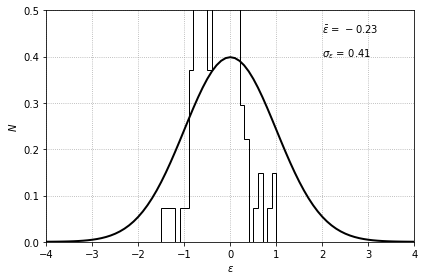

In [22]:
plt.ylim(0.0,0.5)
plt.xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = plt.hist(pull_pipe,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = plt.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
plt.grid(b=True, which='both', color='0.65',linestyle=':')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$N$')
plt.text(2.0,0.45,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe))+'$')#, fontname = 'Times New Roman',size=20)
plt.text(2.0,0.4,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe))+'$')#, fontname = 'Times New Roman',size=20)
plt.tight_layout()
plt.show()